In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
# Load dữ liệu
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Resize ảnh + Chuẩn hóa (dùng tf.data.Dataset)
AUTOTUNE = tf.data.AUTOTUNE

def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label

# Tạo dataset
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)) \
    .map(preprocess, num_parallel_calls=AUTOTUNE) \
    .map(augment, num_parallel_calls=AUTOTUNE) \
    .shuffle(1000).batch(64).prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)) \
    .map(preprocess, num_parallel_calls=AUTOTUNE) \
    .batch(64).prefetch(AUTOTUNE)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,908,682 (91.20 MB)

 Trainable params: 23,908,682 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history_cnn = model_cnn.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds,
    callbacks=[early_stop]
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.2920 - loss: 2.1284 - val_accuracy: 0.4541 - val_loss: 1.5265
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step - accuracy: 0.4011 - loss: 1.6640 - val_accuracy: 0.4899 - val_loss: 1.4323
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.4327 - loss: 1.5766 - val_accuracy: 0.5030 - val_loss: 1.3733
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.4583 - loss: 1.5009 - val_accuracy: 0.5264 - val_loss: 1.3295
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.4740 - loss: 1.4556 - val_accuracy: 0.5223 - val_loss: 1.2978
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.4892 - loss: 1.4225 - val_accuracy: 0.5425 - val_loss: 1.2938
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 87ms/step - accuracy: 0.4989 - loss: 1.3931 - val_accuracy: 0.5545 - val_loss: 1.2531
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 86ms/step - accuracy: 0.5101 - loss: 1.3743 - 

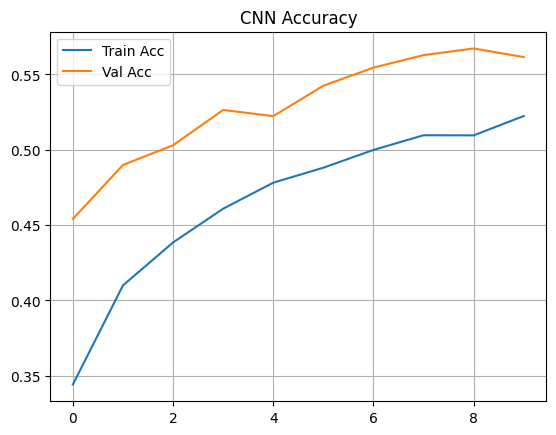

In [5]:
plt.plot(history_cnn.history['accuracy'], label='Train Acc')
plt.plot(history_cnn.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze ResNet

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model_resnet = Model(inputs=base_model.input, outputs=output)
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
history_resnet = model_resnet.fit(
    train_ds,
    epochs=25,
    validation_data=test_ds,
    callbacks=[early_stop]
)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 194s 228ms/step - accuracy: 0.1289 - loss: 2.2996 - val_accuracy: 0.2398 - val_loss: 2.1460
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 218ms/step - accuracy: 0.2059 - loss: 2.1259 - val_accuracy: 0.2360 - val_loss: 2.0300
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 214ms/step - accuracy: 0.2488 - loss: 2.0211 - val_accuracy: 0.2003 - val_loss: 2.1175
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 219ms/step - accuracy: 0.2615 - loss: 1.9928 - val_accuracy: 0.2781 - val_loss: 1.9372
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 197ms/step - accuracy: 0.2904 - loss: 1.9319 - val_accuracy: 0.2911 - val_loss: 1.9157
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 220ms/step - accuracy: 0.3024 - loss: 1.8984 - val_accuracy: 0.2971 - val_loss: 1.8936
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 172s 219ms/step - accuracy: 0.3007 - loss: 1.8924 - val_accuracy: 0.3513 - val_loss: 1.8356
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 221ms/step - accuracy: 0.3289 -

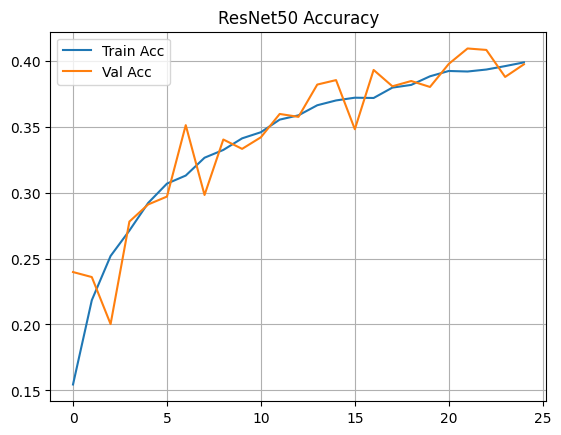

In [8]:
plt.plot(history_resnet.history['accuracy'], label='Train Acc')
plt.plot(history_resnet.history['val_accuracy'], label='Val Acc')
plt.title('ResNet50 Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
loss, acc = model_resnet.evaluate(test_ds)
print(f"Test Accuracy ResNet50: {acc*100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 159ms/step - accuracy: 0.4022 - loss: 1.6300
Test Accuracy ResNet50: 39.75%


In [10]:
loss, acc = model_cnn.evaluate(test_ds)
print(f"Test Accuracy ResNet50: {acc*100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5666 - loss: 1.2162
Test Accuracy ResNet50: 56.72%
